# Exploratory Corpus Analysis
This notebook contains three figures:   
1. Distribution of the 6 class  
   For stratified sampling
2. Average sentence length:  
    As it is mentioned in the assignment instructions  
    > Also note that the TextVectorization step, the we actually cut-off the input after 50 tokens!  
    
    The length of sentence may affect the model's performance. 
3. Distribution of text lengths


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
# Data-reading function

def load_data(file_path):
    categories = [] #initialize list to store categories
    texts = [] #initialize list to store texts
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(sep=' ', maxsplit = 3)
            if len(parts) == 4:
                category, _, _, text = parts # The second and third parts are sentiment tag and index respectively, which we don't need
                categories.append(category)
                texts.append(text)
    return pd.DataFrame({'category': categories, 'text': texts})


After running the function, the new pd dataframe should only contain the review texts and their categorical tag (one of the six)

In [4]:
# Load the data
reviews = load_data('/Users/hongxuzhou/LfD/LfD_Assignment3/corpus_of_reviews.txt')

Start doing analysis

## 1. Distribution of 6 classes

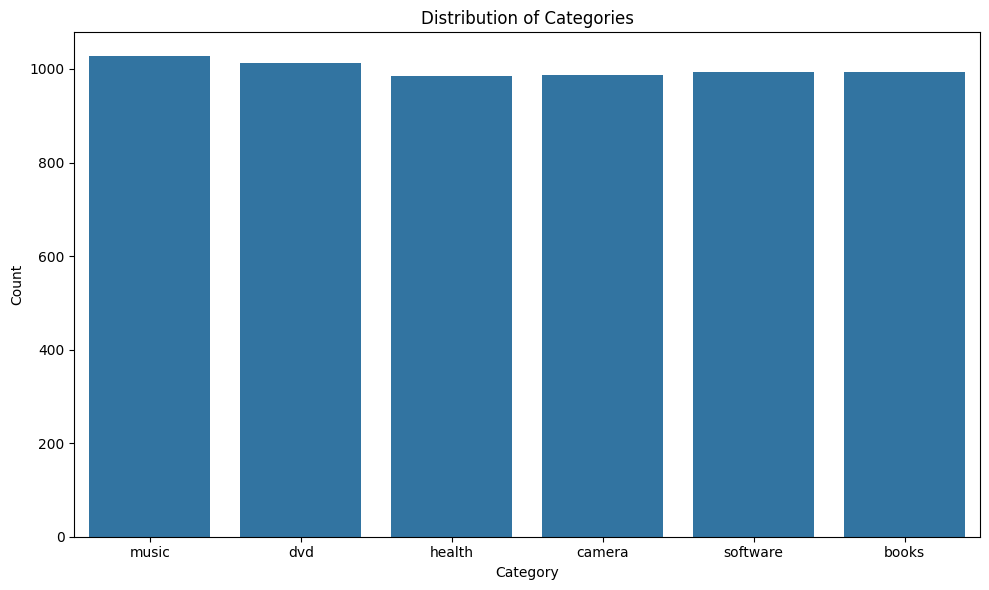

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'category', data = reviews)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count') 
plt.tight_layout()
plt.show()

The data are almost equally distributed. 

## 2. Average length

In [17]:
avg_len = reviews['text'].str.len().mean()
print(f'The average length of the reviews is {avg_len} characters.')

The average length of the reviews is 755.0568333333333 characters.


I wonder how many tokens are 755 characters, or it is not calculated in this way?

## 3. Distribution of the text lengths 

<function matplotlib.pyplot.show(close=None, block=None)>

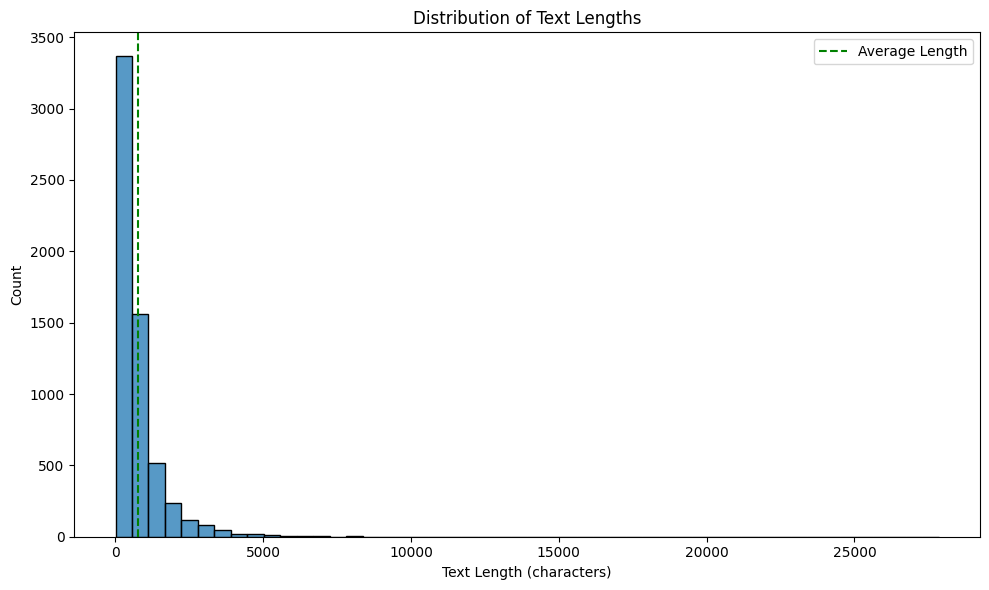

In [23]:
plt.figure(figsize = (10, 6))
sns.histplot(reviews['text'].str.len(), bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Count')
plt.axvline(x = avg_len, color = 'green', linestyle = '--', label = 'Average Length')
plt.legend()
plt.tight_layout()
plt.show 